In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/concat.csv')
df

,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_OLD_ADDR,HPPN_X,HPPN_Y,ACC_PLACE
0,1606778270,19,10,401,2,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826717,충청남도
1,1606760666,13,10,406,1,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341550,36.353695,대전광역시
2,1606775838,19,10,402,1,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136140,36.917900,충청남도
3,1606774124,13,10,401,1,대전광역시 중구 석교동(석교동) 85-14,127.447550,36.306725,대전광역시
4,1606774160,13,10,401,2,대전광역시 중구 석교동(행정:석교동) 88-11,127.447174,36.306694,대전광역시
...,...,...,...,...,...,...,...,...,...
415515,1605972007,13,7,406,1,대전광역시 중구 오류동(행정:오류동) 175-2,127.404540,36.325220,대전광역시
415516,1605973208,13,5,401,1,대전광역시 동구 신흥동(행정:신인동) 212,127.446090,36.320140,대전광역시
415517,1605974239,19,5,406,3,충청남도 천안시 서북구 불당동(행정:불당동) 1540,127.107620,36.813774,충청남도
415518,1605973073,13,5,401,1,대전광역시 동구 신흥동(행정:신인동) 212,127.446090,36.320140,대전광역시


In [3]:
from datetime import datetime
a = datetime.fromtimestamp(1606778270)
a.year, a.month, a.day, a.hour, a.minute, a.second

(2020, 12, 1, 8, 17, 50)

In [4]:
df.iloc[:,0]

0         1606778270
1         1606760666
2         1606775838
3         1606774124
4         1606774160
             ...    
415515    1605972007
415516    1605973208
415517    1605974239
415518    1605973073
415519    1605971722
Name: RECV_CPLT_DM, Length: 415520, dtype: int64

In [5]:
from collections import defaultdict
import calendar
dic = defaultdict(list)
tmp_df = df.iloc[:,0]
for unix in tmp_df:
    unix_time = datetime.fromtimestamp(unix)
    dic['year'].append(unix_time.year)
    dic['month'].append(unix_time.month)
    dic['day'].append(unix_time.day)
    dic['hour'].append(unix_time.hour)
    
df['year'] = dic['year']
df['month'] = dic['month']
df['day'] = dic['day']
df['hour'] = dic['hour']
del dic

days = ['월','화','수','목','금','토','일']

def get_days(dataframe):
    return days[calendar.weekday(dataframe['year'],dataframe['month'],dataframe['day'])]
    
df['days'] = df.apply(get_days, axis = 1)

In [6]:
df

,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_OLD_ADDR,HPPN_X,HPPN_Y,ACC_PLACE,year,month,day,hour,days
0,1606778270,19,10,401,2,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826717,충청남도,2020,12,1,8,화
1,1606760666,13,10,406,1,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341550,36.353695,대전광역시,2020,12,1,3,화
2,1606775838,19,10,402,1,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136140,36.917900,충청남도,2020,12,1,7,화
3,1606774124,13,10,401,1,대전광역시 중구 석교동(석교동) 85-14,127.447550,36.306725,대전광역시,2020,12,1,7,화
4,1606774160,13,10,401,2,대전광역시 중구 석교동(행정:석교동) 88-11,127.447174,36.306694,대전광역시,2020,12,1,7,화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415515,1605972007,13,7,406,1,대전광역시 중구 오류동(행정:오류동) 175-2,127.404540,36.325220,대전광역시,2020,11,22,0,일
415516,1605973208,13,5,401,1,대전광역시 동구 신흥동(행정:신인동) 212,127.446090,36.320140,대전광역시,2020,11,22,0,일
415517,1605974239,19,5,406,3,충청남도 천안시 서북구 불당동(행정:불당동) 1540,127.107620,36.813774,충청남도,2020,11,22,0,일
415518,1605973073,13,5,401,1,대전광역시 동구 신흥동(행정:신인동) 212,127.446090,36.320140,대전광역시,2020,11,22,0,일


In [7]:
df['NPA_CL'].value_counts()     #19 충남 13 대전 31 세종 18 충북

19    240874
13    154385
31     16631
18      1782
15      1314
20       418
8         41
11        34
16        18
21         5
22         5
23         5
17         3
12         2
9          2
10         1
Name: NPA_CL, dtype: int64

In [8]:
df['EVT_CL_CD'].value_counts()      #401 교통사고, 402 교통불편 403 교통위반 406 음주운전

401    255568
406     67834
402     58562
403     33556
Name: EVT_CL_CD, dtype: int64

In [9]:
df['RPTER_SEX'].value_counts() 

1    294007
2     79439
3     42074
Name: RPTER_SEX, dtype: int64

In [10]:
df['year'].value_counts() 

2020    142513
2022    138919
2021    127995
2023      6093
Name: year, dtype: int64

In [11]:
df['month'].value_counts() 

9     39823
10    39220
7     37675
8     37126
5     36461
6     36160
1     35021
11    34102
4     32062
12    31824
3     29498
2     26548
Name: month, dtype: int64

In [12]:
df['day'].value_counts() 

14    14179
18    14101
11    14038
15    13985
8     13962
17    13948
16    13893
3     13860
6     13820
13    13796
20    13789
10    13785
7     13748
5     13721
21    13689
12    13672
9     13663
4     13605
2     13573
19    13488
23    13407
1     13397
24    13365
25    13170
28    13169
29    13146
27    13116
22    13093
26    13043
30    12177
31     8122
Name: day, dtype: int64

In [13]:
df['hour'].value_counts() 

18    29253
17    26300
16    24176
15    23739
14    23469
19    22825
21    22134
13    22122
20    21244
22    21222
12    20250
11    19812
10    18947
9     17672
8     17445
23    17190
0     15013
1     11137
7     10728
2      8148
6      6748
3      6165
4      4957
5      4824
Name: hour, dtype: int64

In [14]:
df['days'].value_counts() 

토    66310
금    65089
목    58567
수    58091
화    57723
월    57617
일    52123
Name: days, dtype: int64

<AxesSubplot: xlabel='days', ylabel='count'>

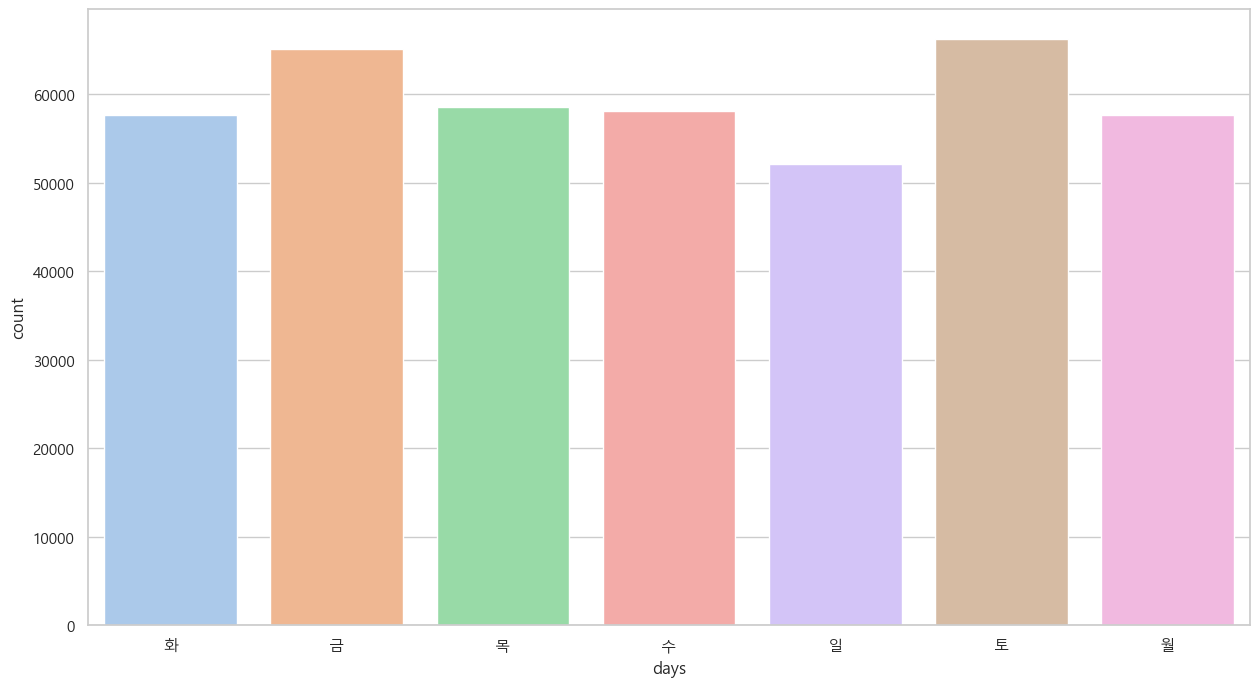

In [15]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set_theme(rc = {'figure.figsize':(15,8)},font ='Malgun Gothic', style="whitegrid")
sns.set_color_codes("pastel")
sns.countplot(x = df['days'], palette='pastel')

<AxesSubplot: xlabel='hour', ylabel='count'>

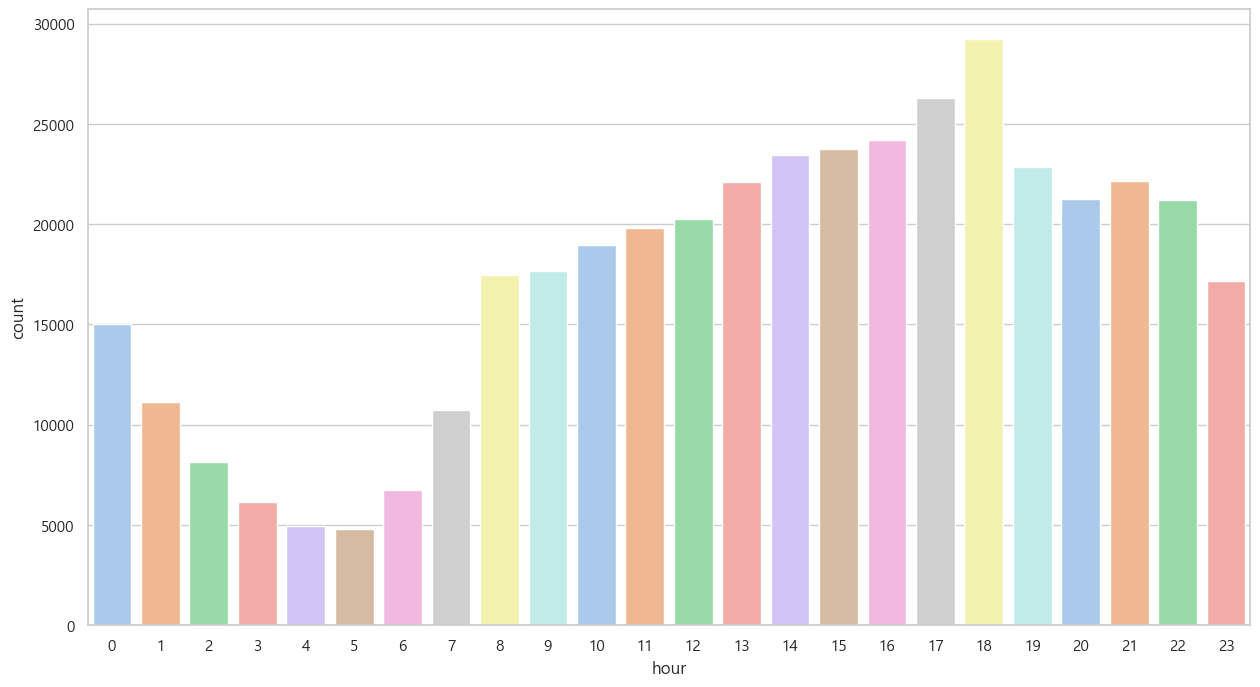

In [16]:
sns.countplot(x = df['hour'], palette='pastel')

In [45]:
ct = pd.crosstab(index=df.hour, columns=df.EVT_CL_CD)
stacked = ct.stack().reset_index().rename(columns={0:'value'})
stacked.loc[stacked['EVT_CL_CD'] == 401, 'EVT_CL_CD'] = '교통사고'
stacked.loc[stacked['EVT_CL_CD'] == 402, 'EVT_CL_CD'] = '교통불편'
stacked.loc[stacked['EVT_CL_CD'] == 403, 'EVT_CL_CD'] = '교통위반'
stacked.loc[stacked['EVT_CL_CD'] == 406, 'EVT_CL_CD'] = '음주운전'
stacked

,hour,EVT_CL_CD,value
0,0,교통사고,6089
1,0,교통불편,790
2,0,교통위반,1297
3,0,음주운전,6837
4,1,교통사고,4274
...,...,...,...
91,22,음주운전,7723
92,23,교통사고,7499
93,23,교통불편,962
94,23,교통위반,1510


Text(0.5, 0, '시간')

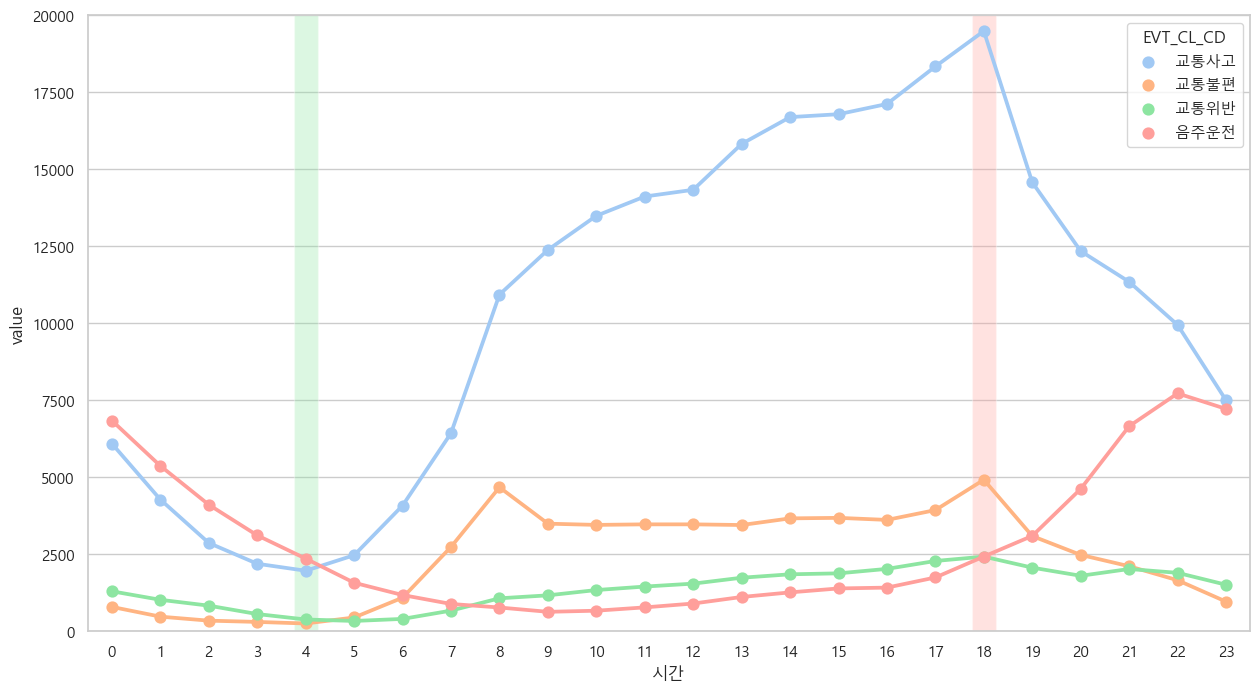

In [62]:
plt.axvspan(17.75, 18.25, facecolor='r', alpha=0.3)
plt.axvspan(3.75, 4.25, facecolor='g', alpha=0.3)
plt.ylim([0,20000])
sns.pointplot(x=stacked.hour, y=stacked.value, hue=stacked.EVT_CL_CD, palette='pastel')
plt.xlabel('시간')

In [20]:
# ct = pd.crosstab(df.day. df)
# stacked = ct.stack().reset_index().rename(columns={0:'value'})
df['hour'].value_counts()

18    29253
17    26300
16    24176
15    23739
14    23469
19    22825
21    22134
13    22122
20    21244
22    21222
12    20250
11    19812
10    18947
9     17672
8     17445
23    17190
0     15013
1     11137
7     10728
2      8148
6      6748
3      6165
4      4957
5      4824
Name: hour, dtype: int64

<AxesSubplot: xlabel='hour', ylabel='count'>

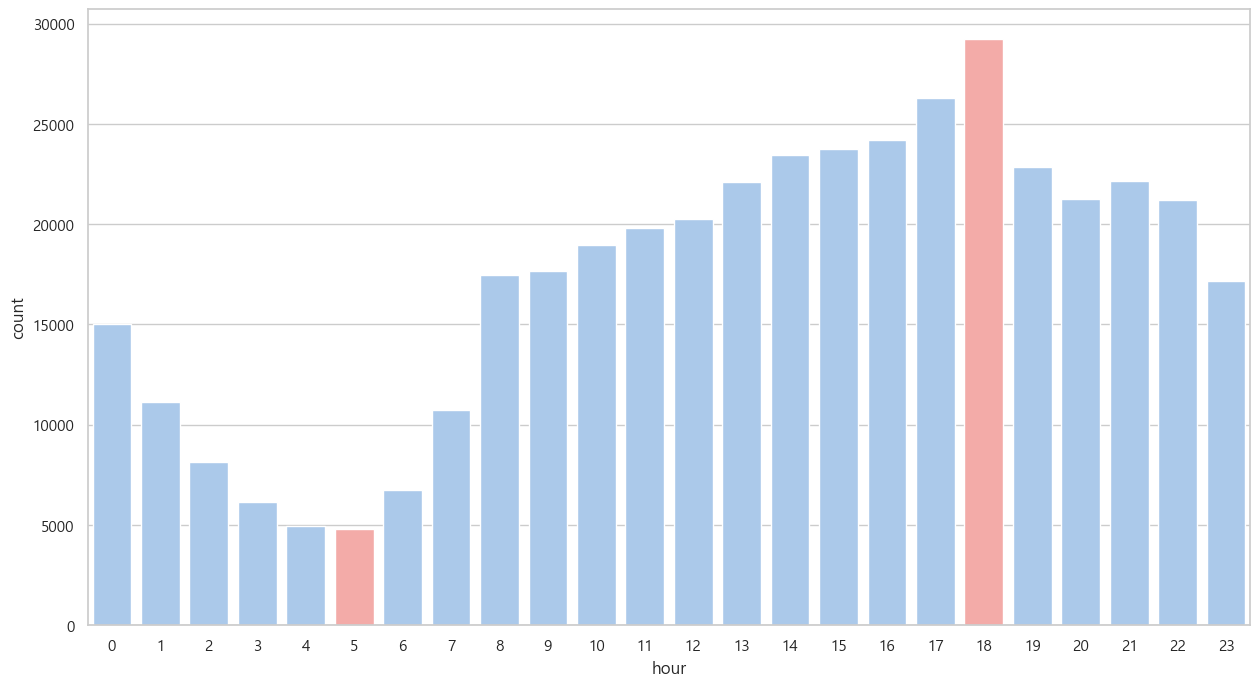

In [42]:
color = ['r' if x == 18 else ('r' if x==5 else 'b') for x in range(24)]
sns.countplot(x=df.hour, palette=color)

<AxesSubplot: xlabel='month', ylabel='count'>

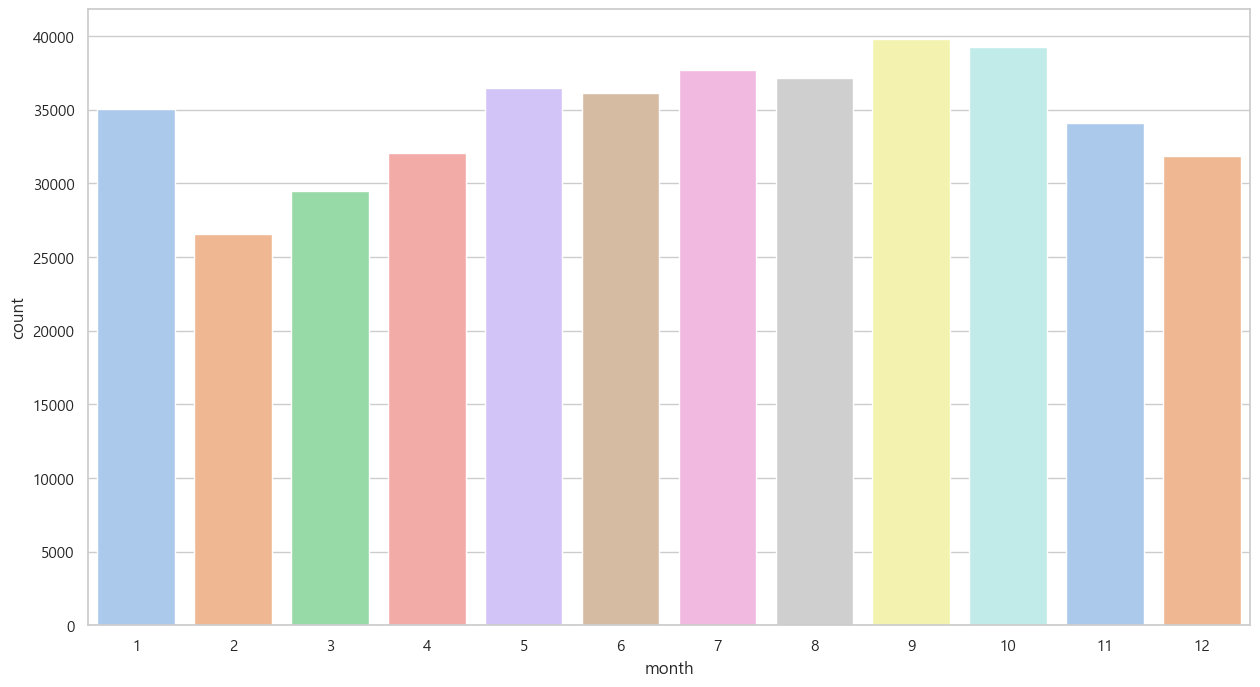

In [22]:
sns.countplot(x = df['month'], palette='pastel')

<AxesSubplot: xlabel='year', ylabel='count'>

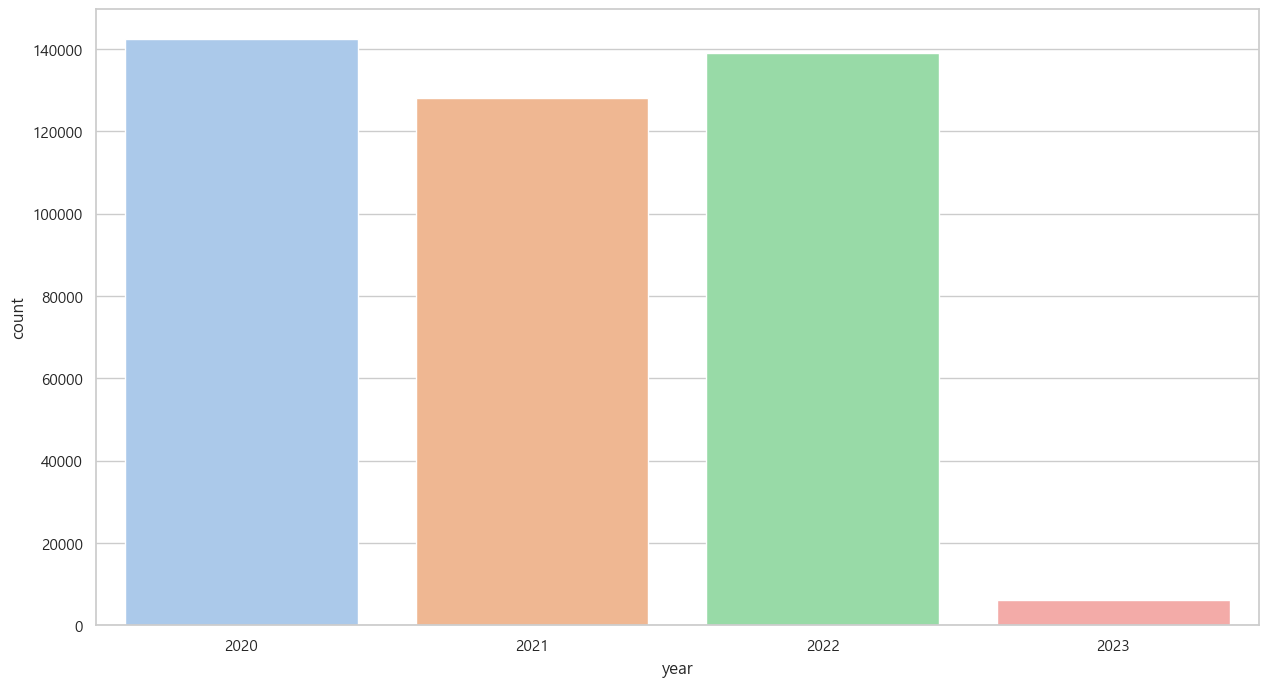

In [23]:
sns.countplot(x = df['year'], palette='pastel')

In [24]:
ct = pd.crosstab(index=df.RPTER_SEX, columns=df.EVT_CL_CD)
stacked = ct.stack().reset_index().rename(columns={0:'value'})
stacked.loc[stacked['EVT_CL_CD'] == 401, 'EVT_CL_CD'] = '교통사고'
stacked.loc[stacked['EVT_CL_CD'] == 402, 'EVT_CL_CD'] = '교통불편'
stacked.loc[stacked['EVT_CL_CD'] == 403, 'EVT_CL_CD'] = '교통위반'
stacked.loc[stacked['EVT_CL_CD'] == 406, 'EVT_CL_CD'] = '음주운전'
stacked.loc[stacked['RPTER_SEX'] == 1, 'RPTER_SEX'] = '남성'
stacked.loc[stacked['RPTER_SEX'] == 2, 'RPTER_SEX'] = '여성'
stacked.loc[stacked['RPTER_SEX'] == 3, 'RPTER_SEX'] = '성별불명'
stacked

,RPTER_SEX,EVT_CL_CD,value
0,남성,교통사고,175736
1,남성,교통불편,42044
2,남성,교통위반,24304
3,남성,음주운전,51923
4,여성,교통사고,56945
5,여성,교통불편,9961
6,여성,교통위반,3715
7,여성,음주운전,8818
8,성별불명,교통사고,22887
9,성별불명,교통불편,6557


<AxesSubplot: xlabel='RPTER_SEX', ylabel='value'>

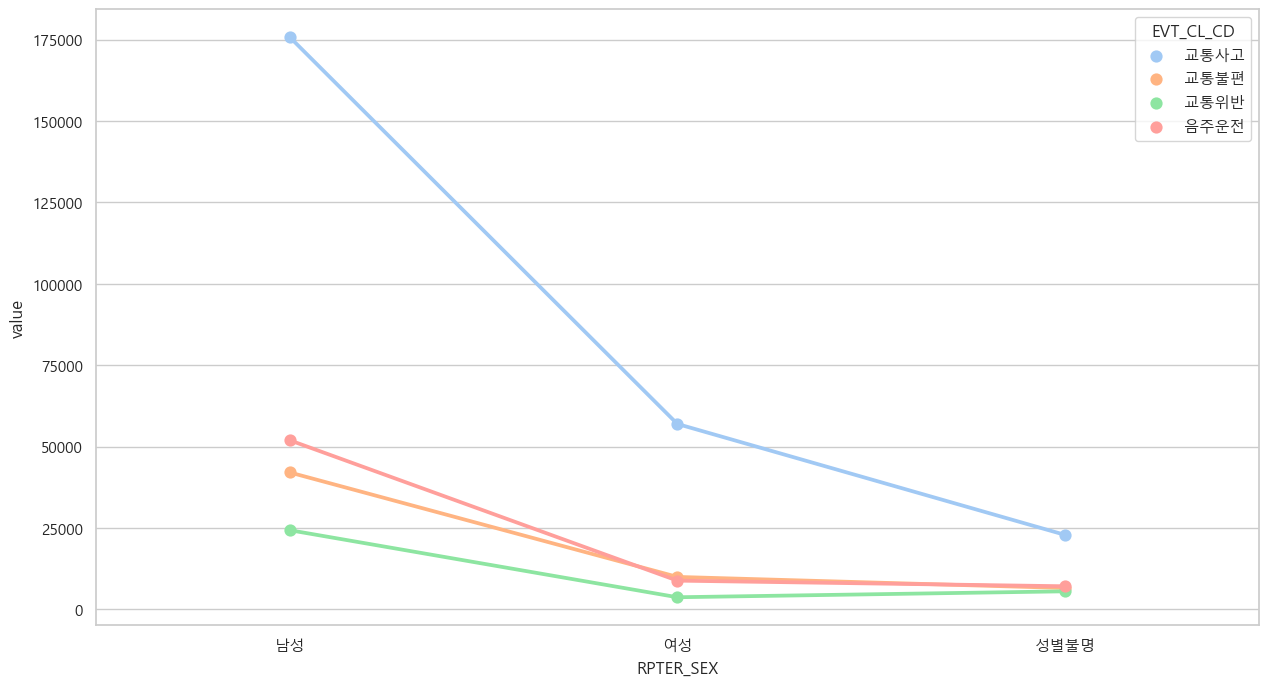

In [25]:
sns.pointplot(x=stacked.RPTER_SEX, y=stacked.value, hue=stacked.EVT_CL_CD, palette='pastel')

In [67]:
df['month'].value_counts()

9     39823
10    39220
7     37675
8     37126
5     36461
6     36160
1     35021
11    34102
4     32062
12    31824
3     29498
2     26548
Name: month, dtype: int64

In [63]:
ct = pd.crosstab(index=df.month, columns=df.EVT_CL_CD)
stacked = ct.stack().reset_index().rename(columns={0:'value'})
stacked.loc[stacked['EVT_CL_CD'] == 401, 'EVT_CL_CD'] = '교통사고'
stacked.loc[stacked['EVT_CL_CD'] == 402, 'EVT_CL_CD'] = '교통불편'
stacked.loc[stacked['EVT_CL_CD'] == 403, 'EVT_CL_CD'] = '교통위반'
stacked.loc[stacked['EVT_CL_CD'] == 406, 'EVT_CL_CD'] = '음주운전'

<AxesSubplot: xlabel='month', ylabel='value'>

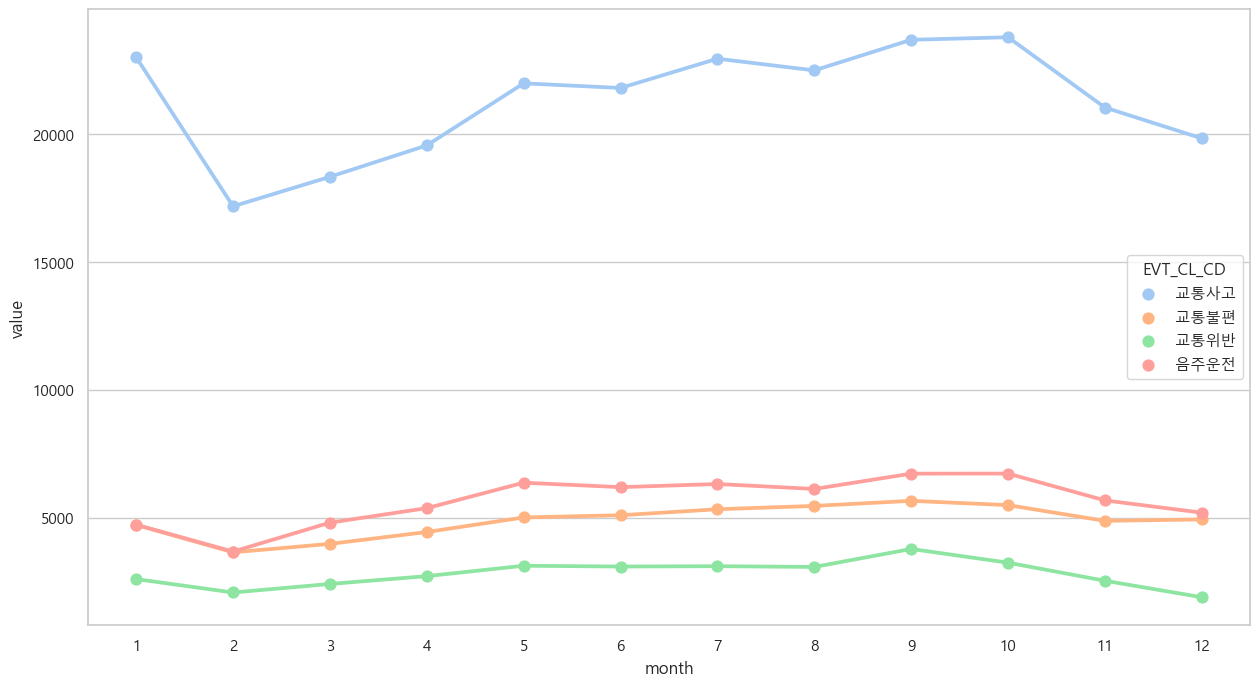

In [64]:
sns.pointplot(x=stacked.month, y=stacked.value, hue=stacked.EVT_CL_CD, palette='pastel')


In [37]:
import itertools

ct = pd.crosstab(index=df.days, columns=df.EVT_CL_CD)
stacked = ct.stack().reset_index().rename(columns={0:'value'})
stacked.loc[stacked['EVT_CL_CD'] == 401, 'EVT_CL_CD'] = '교통사고'
stacked.loc[stacked['EVT_CL_CD'] == 402, 'EVT_CL_CD'] = '교통불편'
stacked.loc[stacked['EVT_CL_CD'] == 403, 'EVT_CL_CD'] = '교통위반'
stacked.loc[stacked['EVT_CL_CD'] == 406, 'EVT_CL_CD'] = '음주운전'

# stacked.loc[stacked['days'] == '월', 'days'] = '0월'
# stacked.loc[stacked['days'] == '화', 'days'] = '1화'
# stacked.loc[stacked['days'] == '수', 'days'] = '2수'
# stacked.loc[stacked['days'] == '목', 'days'] = '3목'
# stacked.loc[stacked['days'] == '금', 'days'] = '4금'
# stacked.loc[stacked['days'] == '토', 'days'] = '5토'
# stacked.loc[stacked['days'] == '일', 'days'] = '6일'
sort_pivot = list2 = list(itertools.chain(*[[x]*4 for x in [4,3,2,0,6,5,1]]))
stacked['pivot'] = sort_pivot
stacked.sort_values('pivot', inplace=True)

In [38]:
stacked

,days,EVT_CL_CD,value,pivot
13,월,교통불편,7711,0
15,월,음주운전,7638,0
14,월,교통위반,4075,0
12,월,교통사고,38193,0
25,화,교통불편,7941,1
24,화,교통사고,37290,1
26,화,교통위반,4242,1
27,화,음주운전,8250,1
8,수,교통사고,37040,2
9,수,교통불편,8069,2


<AxesSubplot: xlabel='days', ylabel='value'>

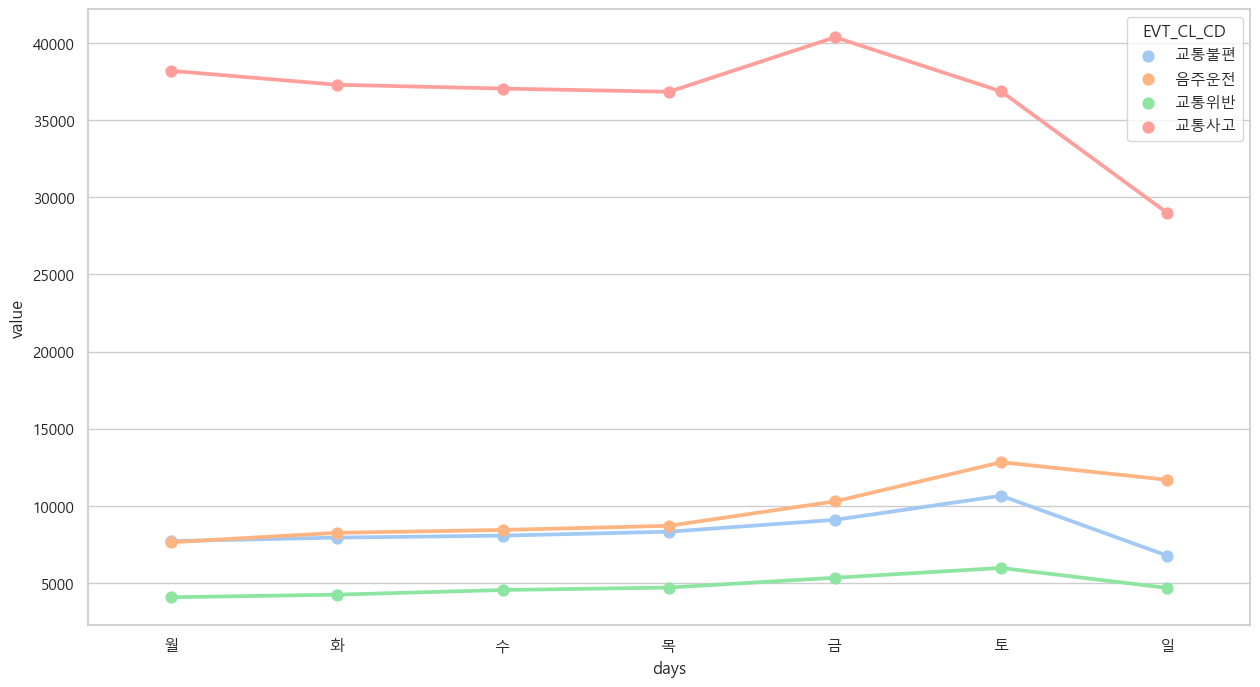

In [39]:
sns.pointplot(x=stacked.days, y=stacked.value, hue=stacked.EVT_CL_CD, palette='pastel')